In [2]:
import pandas as pd
import numpy as np
import ast
import os
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../')
from modules import utils, constants
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
SEED = 63
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)

#### X_test

In [5]:
#df = pd.read_csv('data/anemia_synth_dataset_hb_some_nans.csv')
#df = pd.read_csv('data/noisy_data_uniform_all_30_08_22.csv')
# df = pd.read_csv('../../data/more_features/more_feats_correlated_noisy_6.csv')
# df = df.fillna(-1)
# class_dict = constants.CLASS_DICT
test_set = pd.read_csv('../data/test_set_basic.csv')
X_test = test_set.iloc[:, 0:-1]
y_test = test_set.iloc[:, -1]
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((14000, 26), (14000,))

In [4]:
test_set.head()

,ana,fever,leukopenia,thrombocytopenia,auto_immune_hemolysis,delirium,psychosis,seizure,non_scarring_alopecia,oral_ulcers,...,proteinuria,renal_biopsy_class,anti_cardioliphin_antibodies,anti_b2gp1_antibodies,lupus_anti_coagulant,c3,c4,anti_dsdna_antibody,anti_smith_antibody,label
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,5,0,0,0,1,1,1,0,1
3,1,0,0,0,0,1,0,0,0,1,...,0,2,0,0,0,1,1,0,0,1
4,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0


#### test_df

In [5]:
test_df =pd.read_csv('../test_dfs/dqn_test_df_balanced_14000000.csv')
test_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,score,is_success
0,0.0,8.0,1.0,0.0,0.0,"['anti_smith_antibody', 'acute_pericarditis', ...",0.0,0.0,1.0
1,1.0,8.0,1.0,0.0,0.0,"['anti_smith_antibody', 'acute_pericarditis', ...",False,0.0,True
2,2.0,8.0,1.0,1.0,1.0,"['anti_smith_antibody', 'acute_pericarditis', ...",False,6.0,True
3,3.0,8.0,1.0,1.0,1.0,"['anti_smith_antibody', 'acute_pericarditis', ...",False,0.0,True
4,4.0,9.0,-1.0,1.0,0.0,"['anti_smith_antibody', 'acute_pericarditis', ...",False,5.0,False


In [6]:
test_set.label.unique()

array([0, 1])

In [7]:
len(test_df)

14000

In [8]:
test_df.y_pred.value_counts()

0.0    10373
1.0     3627
Name: y_pred, dtype: int64

In [9]:
def get_idx_df(target_df, idx_list):
    idx_df = target_df.iloc[idx_list]
    return idx_df

In [10]:
def get_indices(df, feat): #get indices n  df where feature is in pathway
    idx_dict = {}
    for i, row in df.iterrows():
        pathway = ast.literal_eval(row['trajectory'])
        if feat in pathway:
            feat_idx = pathway.index(feat)
            next_element = pathway[feat_idx+1]
            if next_element not in list(idx_dict.keys()):
                idx_dict[next_element] = [row.name]
            else:
                idx_dict[next_element].append(row.name)
    return idx_dict

In [11]:
def get_distribution(df, feat): #df = anemia_test_df feat = where branching happens and whose value distribution we desire
    feat_dict = get_indices(df, feat)
    next_feat_df_dict = {}
    for i, next_feat in enumerate(list(feat_dict.keys())):
        next_feat_df = get_idx_df(test_set, feat_dict[next_feat])
        next_feat_df_dict[next_feat] = next_feat_df[feat]
    combined_df = pd.DataFrame(next_feat_df_dict)
    sns.set_style('dark')
    gfg = sns.boxplot(data = combined_df, palette='pastel')
    gfg.set(ylabel = feat, title = f'{feat} value distribution')
    plt.xticks(rotation=90)
    sns.despine()
    plt.show()    
    return combined_df

#### No Lupus

In [13]:
no_num = 0
no_df = test_df[test_df.y_pred == no_num]
no_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,score,is_success
0,0.0,8.0,1.0,0.0,0.0,"['anti_smith_antibody', 'acute_pericarditis', ...",0.0,0.0,1.0
1,1.0,8.0,1.0,0.0,0.0,"['anti_smith_antibody', 'acute_pericarditis', ...",False,0.0,True
5,5.0,8.0,-1.0,0.0,1.0,"['anti_smith_antibody', 'acute_pericarditis', ...",False,0.0,False
6,6.0,8.0,1.0,0.0,0.0,"['anti_smith_antibody', 'acute_pericarditis', ...",False,0.0,True
7,7.0,8.0,1.0,0.0,0.0,"['anti_smith_antibody', 'acute_pericarditis', ...",False,0.0,True


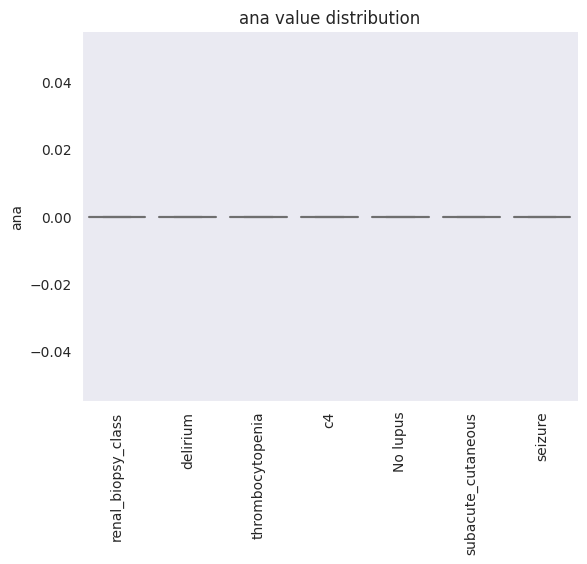

In [14]:
no_ana_distribution = get_distribution(no_df, 'ana')

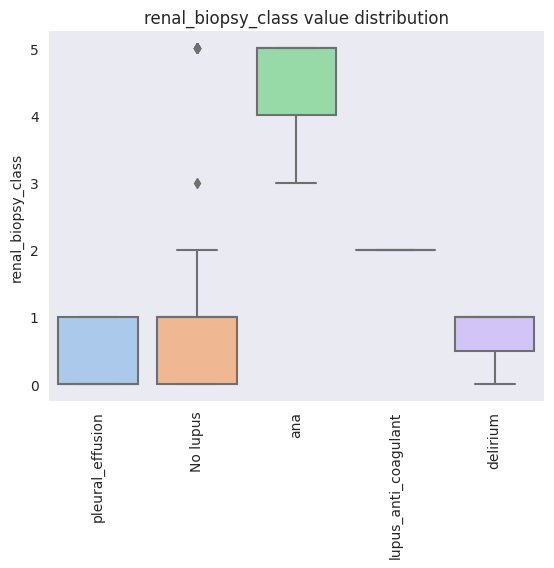

In [15]:
no_biopsy_distribution = get_distribution(no_df, 'renal_biopsy_class')

#### Lupus

In [16]:
lupus_num = 1
lupus_df = test_df[test_df.y_pred == lupus_num]
lupus_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,score,is_success
2,2.0,8.0,1.0,1.0,1.0,"['anti_smith_antibody', 'acute_pericarditis', ...",False,6.0,True
3,3.0,8.0,1.0,1.0,1.0,"['anti_smith_antibody', 'acute_pericarditis', ...",False,0.0,True
4,4.0,9.0,-1.0,1.0,0.0,"['anti_smith_antibody', 'acute_pericarditis', ...",False,5.0,False
11,11.0,9.0,-1.0,1.0,0.0,"['anti_smith_antibody', 'acute_pericarditis', ...",False,5.0,False
13,13.0,8.0,1.0,1.0,1.0,"['anti_smith_antibody', 'acute_pericarditis', ...",False,0.0,True


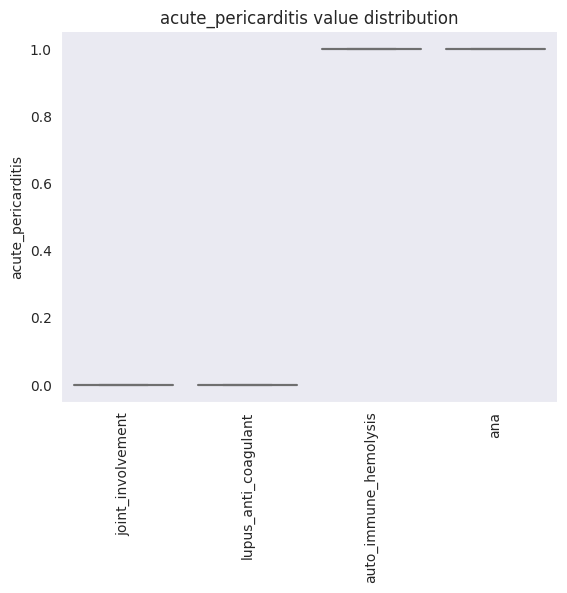

In [17]:
lupus_renal_distribution = get_distribution(lupus_df, 'acute_pericarditis')

In [1]:
import multiprocessing
print("Number of cpu : ", multiprocessing.cpu_count())

Number of cpu :  20
